In [27]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import missingno as msno
import pandas_profiling as pp

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import classification_report

# Miscellaneous
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [28]:
df= pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [29]:
df.shape

(303, 14)

In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

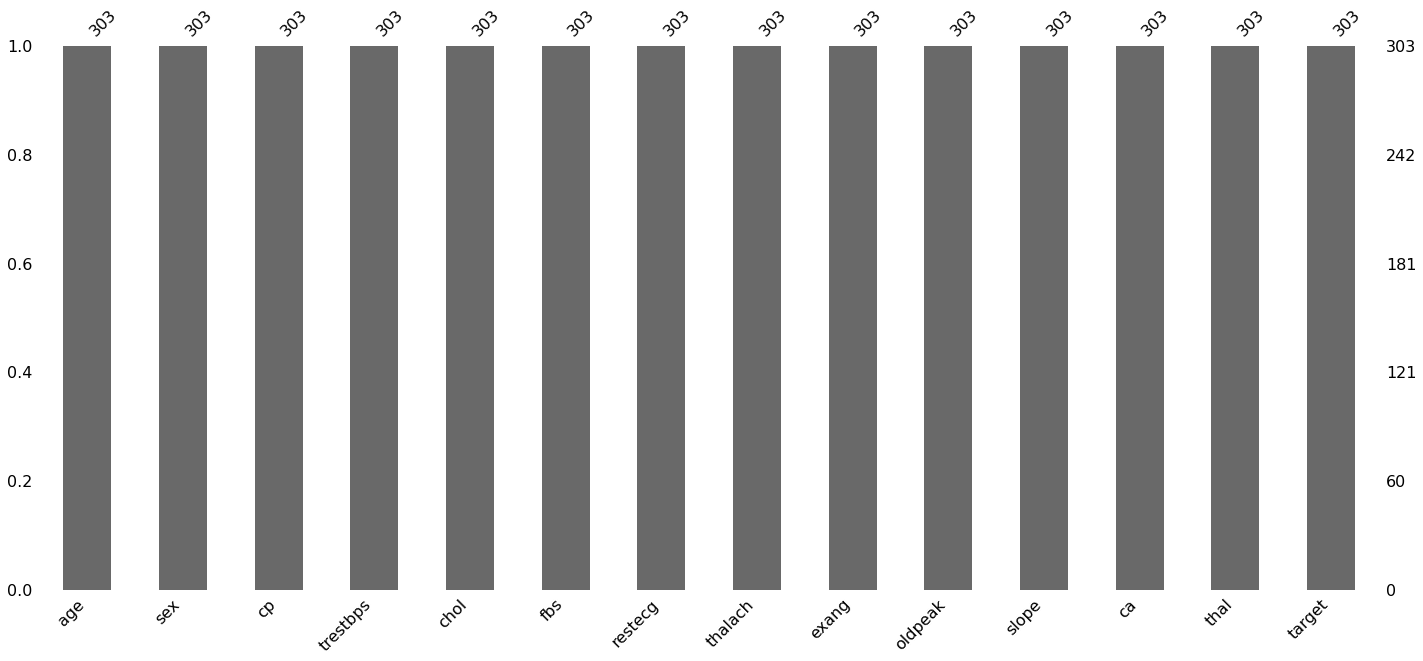

In [32]:
 msno.bar(df)

<AxesSubplot:>

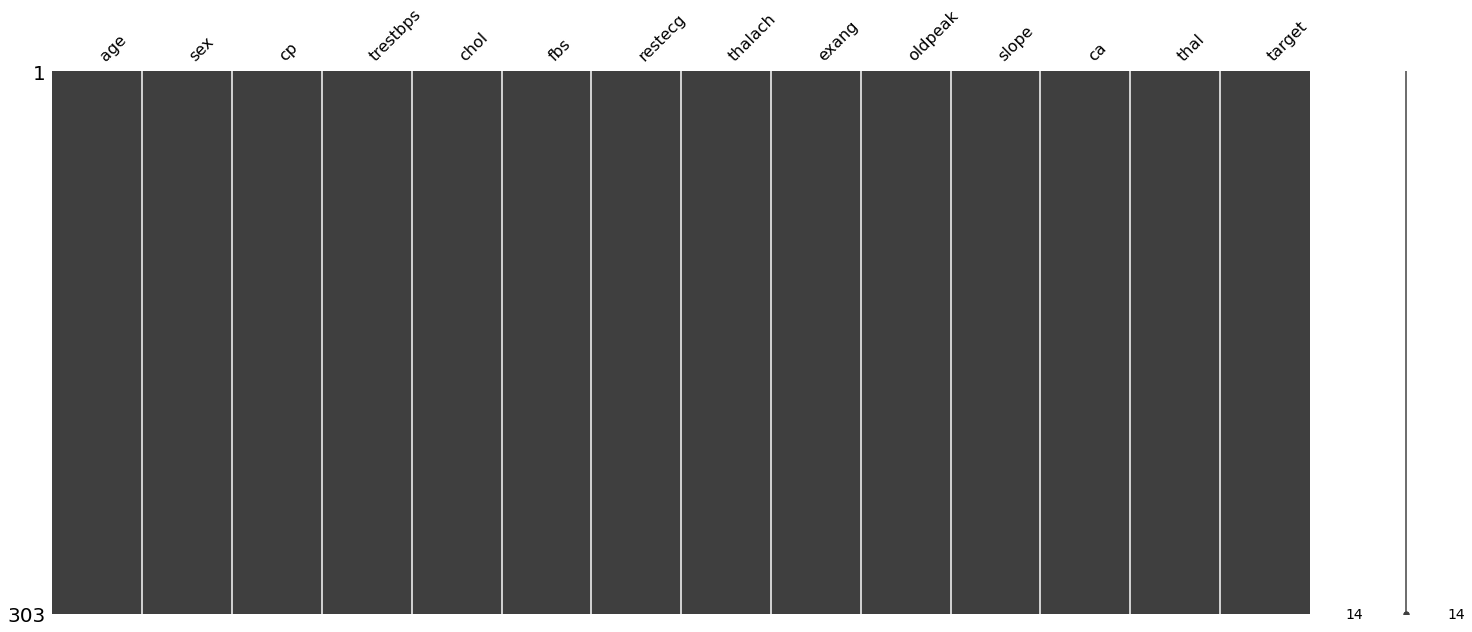

In [33]:
msno.matrix(df)

In [34]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [35]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [36]:
pd.crosstab(df.sex,df.cp)

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


In [37]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
y= df['target']
X=df.drop('target',axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Support vector Classifier with rbf kernel
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print(svc_conf_matrix)
print(svc_acc_score*100)
print(classification_report(y_test,svc_predicted))

[[23  5]
 [ 4 29]]
85.24590163934425
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



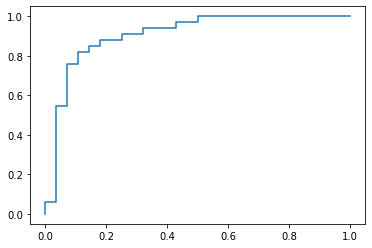

In [40]:
SVM_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
fpr, tpr, threshods = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label= SVM_roc_auc) 

In [41]:
# Support vector Classifier with linear kernel
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print(svc_conf_matrix)
print(svc_acc_score*100)
print(classification_report(y_test,svc_predicted))

[[22  6]
 [ 3 30]]
85.24590163934425
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



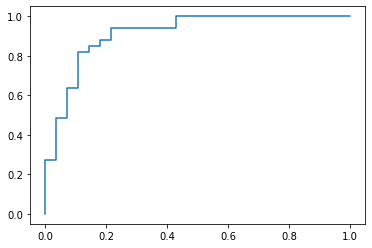

In [42]:
SVM_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
fpr, tpr, threshods = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label= SVM_roc_auc) 

In [43]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion= 'entropy' , random_state=0, max_depth=4)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print(dt_conf_matrix) 
print(dt_acc_score*100)
print(classification_report(y_test,dt_predicted))

[[23  5]
 [10 23]]
75.40983606557377
              precision    recall  f1-score   support

           0       0.70      0.82      0.75        28
           1       0.82      0.70      0.75        33

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



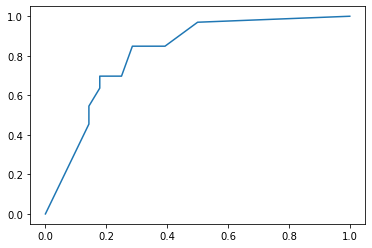

In [44]:
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, threshods = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label= dt_roc_auc) 

In [45]:
# Random Forest Classifier
rf =RandomForestClassifier(n_estimators = 10, random_state =0)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print(rf_conf_matrix) 
print(rf_acc_score*100)
print(classification_report(y_test,rf_predicted))

[[20  8]
 [ 6 27]]
77.04918032786885
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



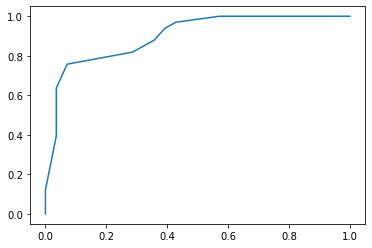

In [46]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, threshods = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label= rf_roc_auc) 

In [47]:
# Logistic Regression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)
print(lr_conf_matrix) 
print(lr_acc_score*100)
print(classification_report(y_test,lr_predicted))

[[22  6]
 [ 3 30]]
85.24590163934425
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



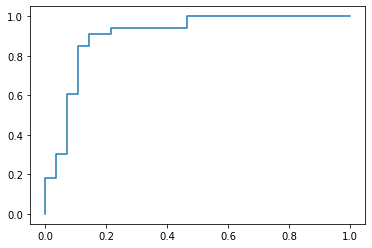

In [48]:
lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, threshods = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label= lr_roc_auc) 

In [49]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print(nb_conf_matrix)
print(nb_acc_score)
print(classification_report(y_test,nbpred))

[[21  7]
 [ 5 28]]
0.8032786885245902
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



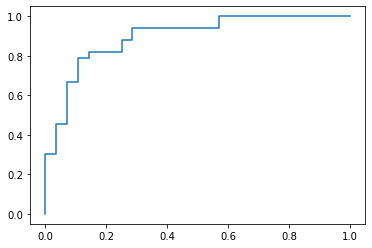

In [50]:
nb_roc_auc = roc_auc_score(y_test, nb.predict(X_test))
fpr, tpr, threshods = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label= nb_roc_auc) 

In [51]:
 # K-NeighbrsClassifier
knn = KNeighborsClassifier(n_neighbors =6)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(knn_conf_matrix)
print(knn_acc_score)
print(classification_report(y_test,knn_predicted))

[[21  7]
 [ 4 29]]
0.819672131147541
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



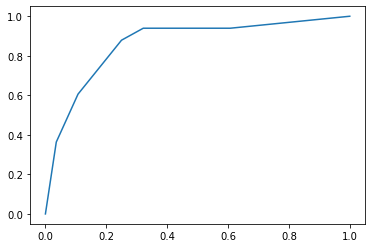

In [52]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, threshods = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label= knn_roc_auc) 